# **Import Modules**

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# **Dataset Loading**

In [42]:
df = pd.read_csv('Customer Data.csv')

In [43]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# **Initial Penta-Set Data**

In [44]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Terminal Penta-Set Data**

In [45]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


# **Exploratory Data Analysis**

In [46]:
df.shape

(8950, 18)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [48]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# **Null-Value Evaluation in Dataset**

**Replacing Missing values with Mean values in the Dataset**

In [49]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [50]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Checking for Duplicate Rows in the Dataset**

In [51]:
df.duplicated().sum()

0

**Terminating CUST_ID column in Dataset**

In [52]:
df.drop(columns=["CUST_ID"], axis = 1, inplace = True)

In [53]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# **Dataset Pre-Processing**

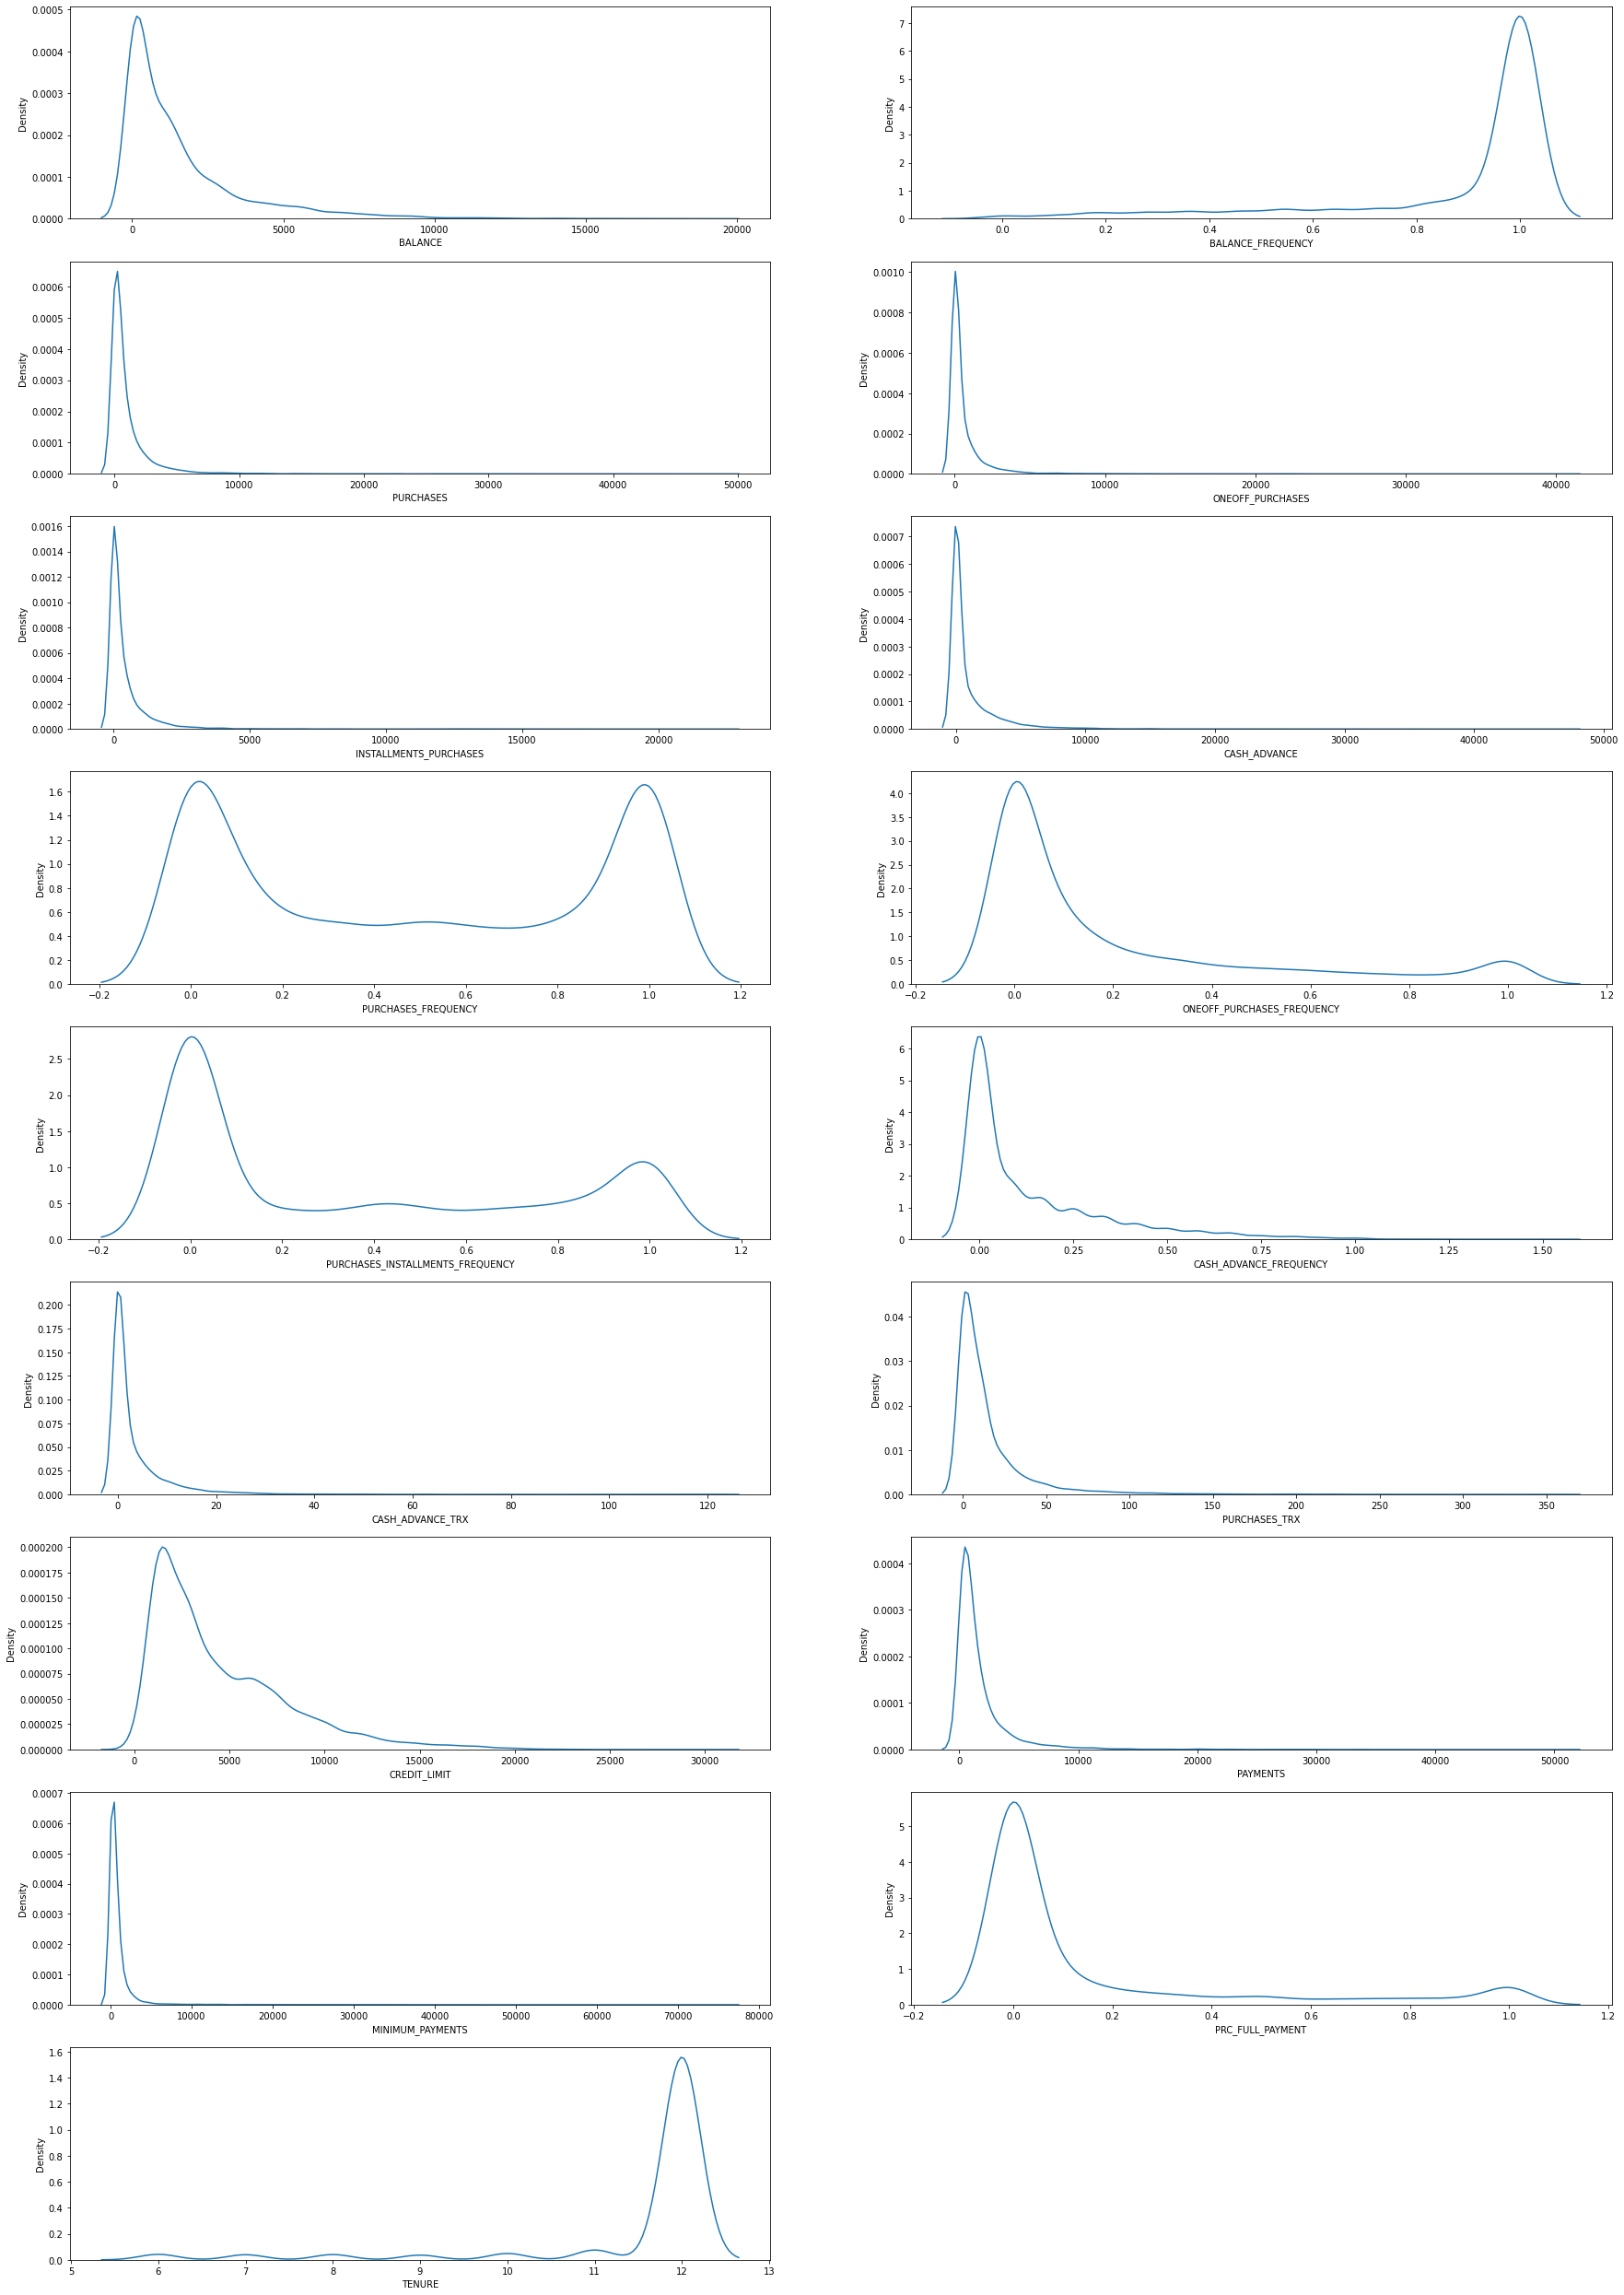

In [54]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
  if df[col].dtype != 'object':
    ax = plt.subplot(9,2,i+1)
    sns.kdeplot(df[col], ax = ax)
    plt.xlabel(col)
plt.show()

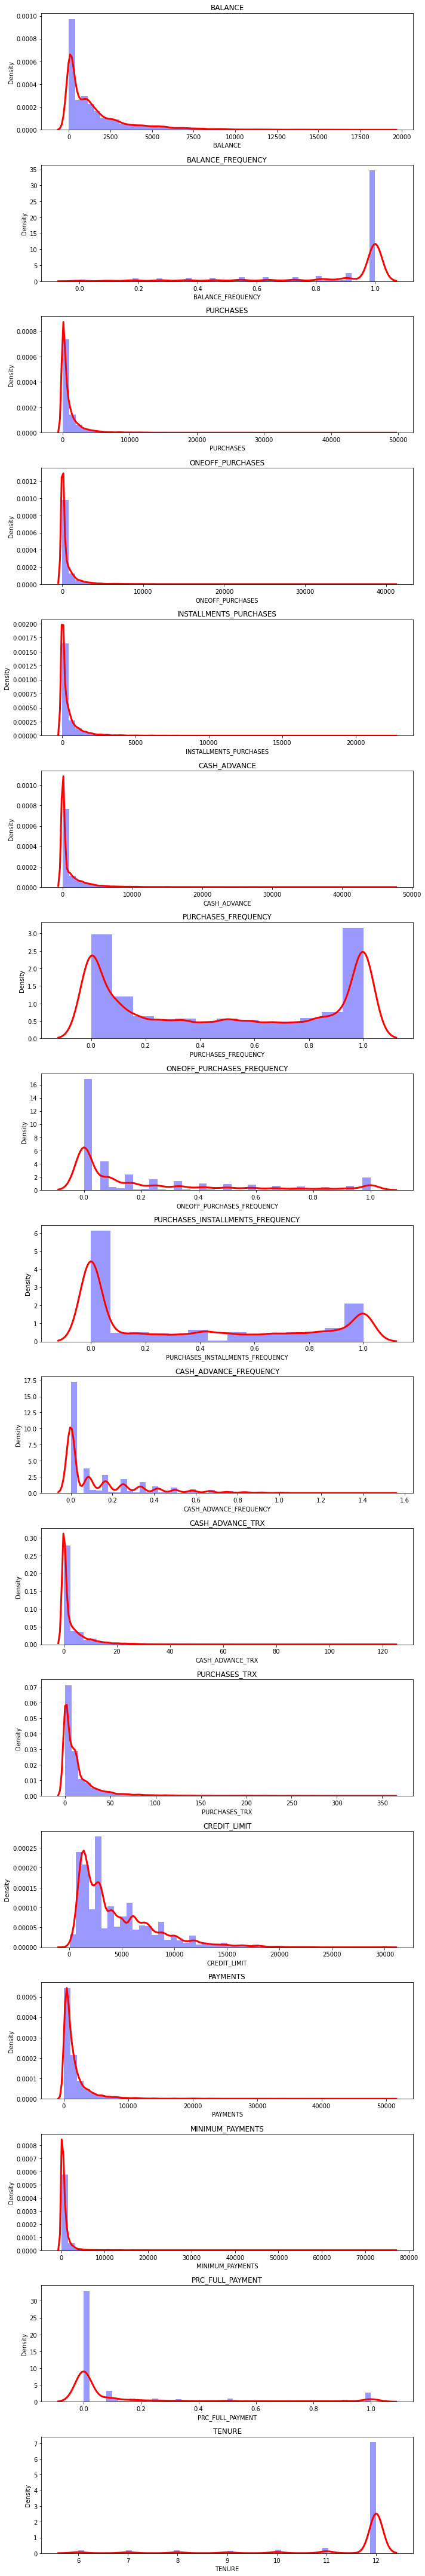

In [55]:
plt.figure(figsize=(10,60))
for i in range(0,17):
  plt.subplot(17,1,i+1)
  sns.distplot(df[df.columns[i]], kde_kws = {'color':'r','bw':0.1,'lw':3,'label':'KDE'},hist_kws = {'color':'b'})
  plt.title(df.columns[i])
plt.tight_layout()  

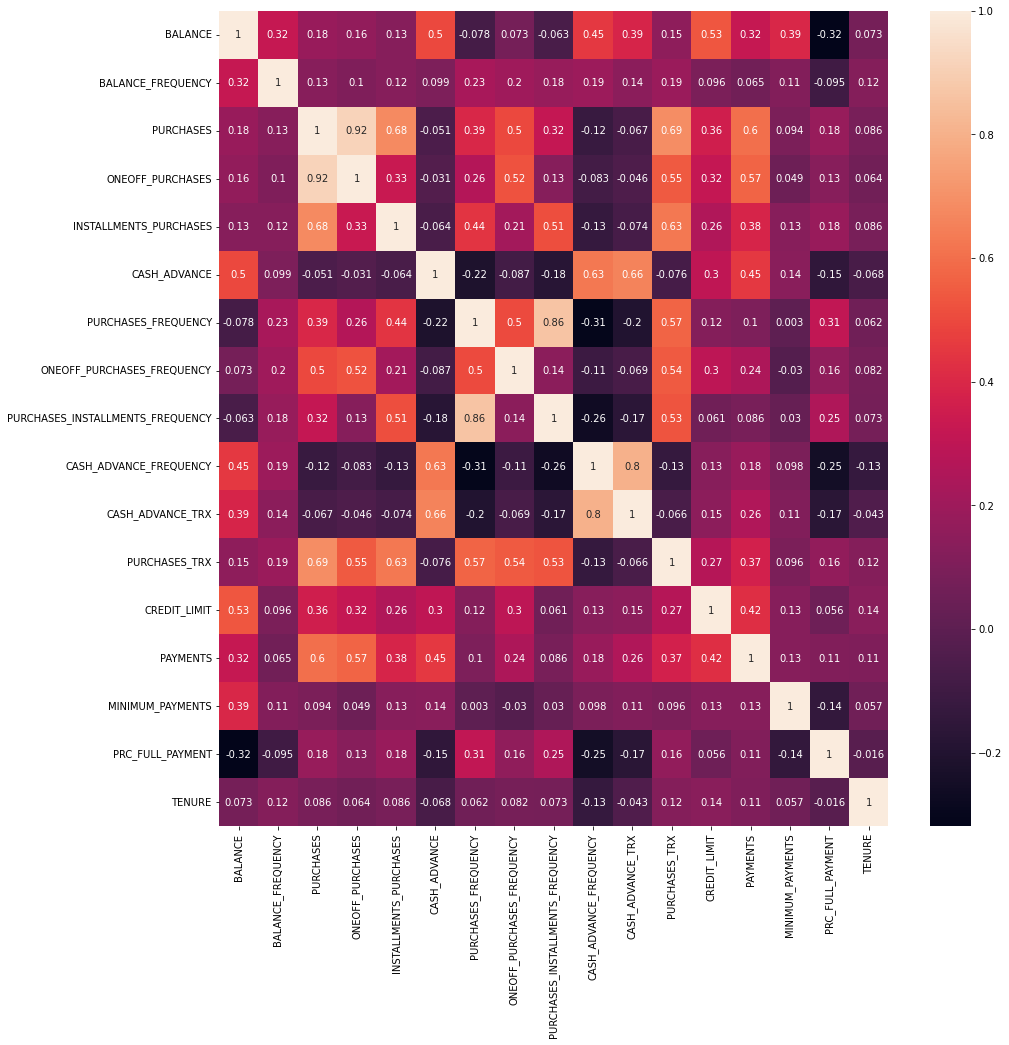

In [56]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

# **DataFrame Scaling**

In [57]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

# **Dimensionality Reduction**

**Conversion of DataFrame into 2D DataFrame for Visualization**

In [58]:
pco = PCA(n_components = 2)
prin_comp = pco.fit_transform(scaled_df)
pco_df = pd.DataFrame(data = prin_comp, columns = ["PCO1","PCO2"])
pco_df

,PCO1,PCO2
0,-1.682223,-1.076435
1,-1.138299,2.506515
2,0.969697,-0.383590
3,-0.873630,0.043184
4,-1.599436,-0.688567
...,...,...
8945,-0.359633,-2.016127
8946,-0.564370,-1.639121
8947,-0.926207,-1.810770
8948,-2.336557,-0.657944


# **Hyperparameter Tuning**

**Finding k-value by Elbow Method**

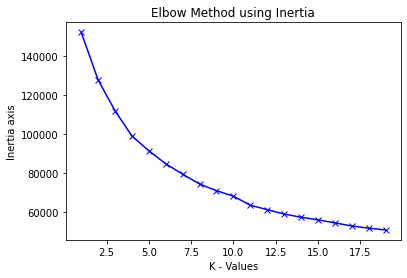

In [59]:
inertia = []
range_val = range(1,20)
for i in range_val:
  kmean = KMeans(n_clusters = i)
  kmean.fit_predict(pd.DataFrame(scaled_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('K - Values')
plt.ylabel('Inertia axis')
plt.title('Elbow Method using Inertia')
plt.show()  

# **Model Building using KMeans**

In [60]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pco_df_kmeans = pd.concat([pco_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis = 1)

# **Clustered Dataframe Visualization**

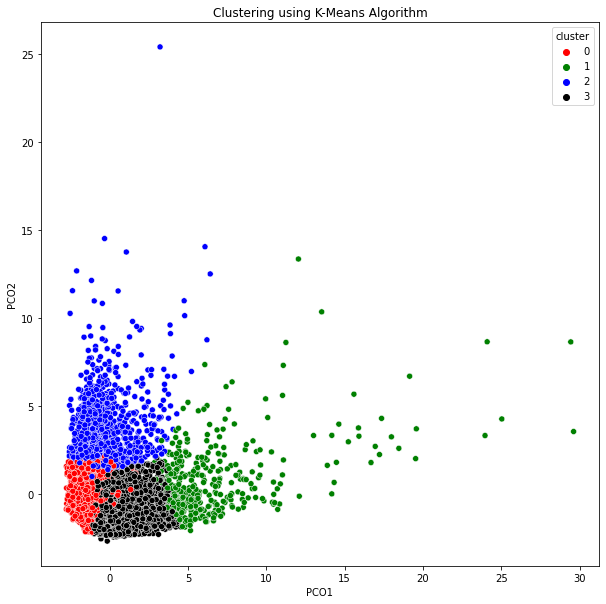

In [61]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "PCO1", y = "PCO2", hue = "cluster", data = pco_df_kmeans, palette = ['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

**Finding Cluster centers**

In [62]:
cluster_centers = pd.DataFrame(data = kmeans_model.cluster_centers_, columns = [df.columns])

**Inverse Transform Data**

In [63]:
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


**Target column Cluster for storing Cluster Segment**

In [64]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster' : kmeans_model.labels_})],axis = 1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [65]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [66]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,1
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,1
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,1
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,1
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,1
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,1


In [67]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,2
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2


In [68]:
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,3
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,3
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,3
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,3
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,3


**Visualization**

<Axes: xlabel='Cluster', ylabel='count'>

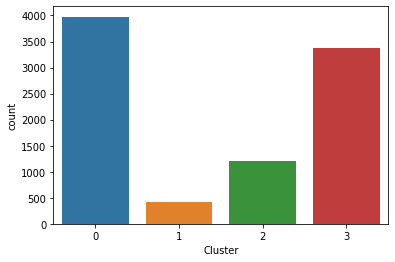

In [69]:
sns.countplot(x = 'Cluster', data = cluster_df)

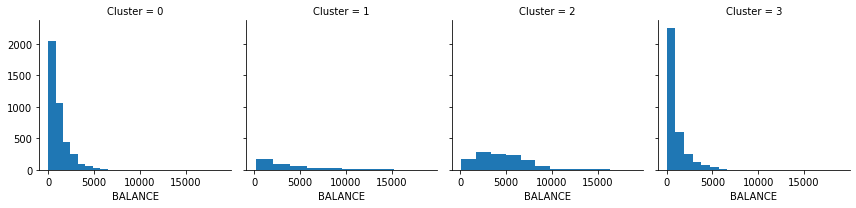

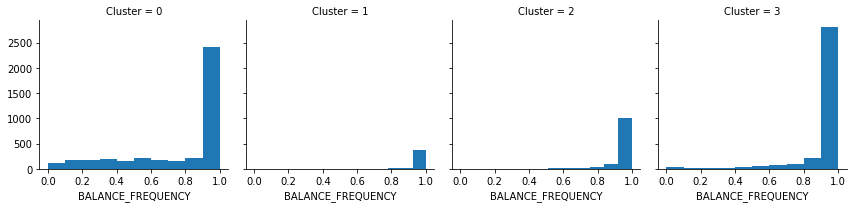

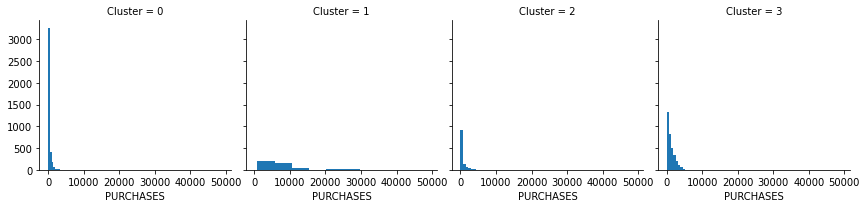

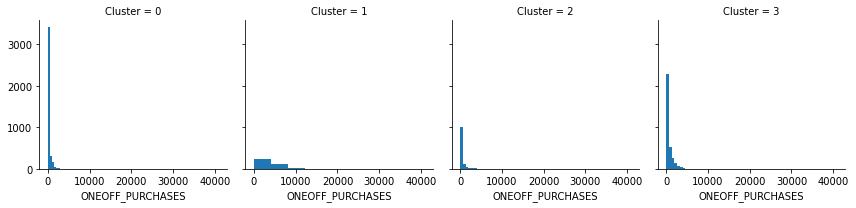

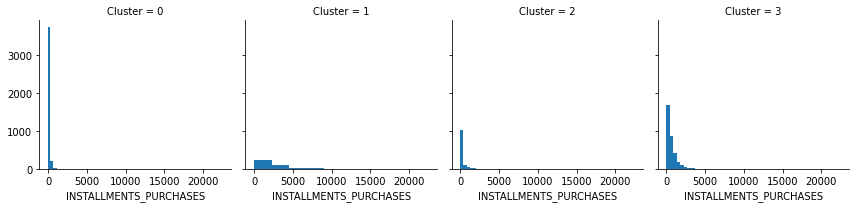

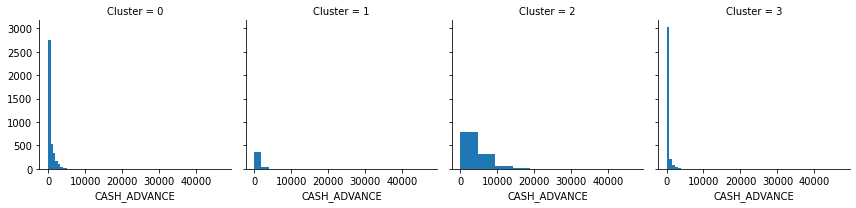

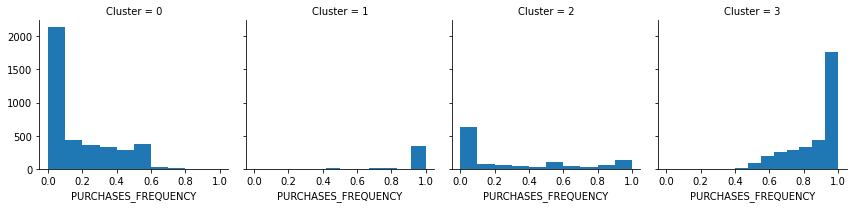

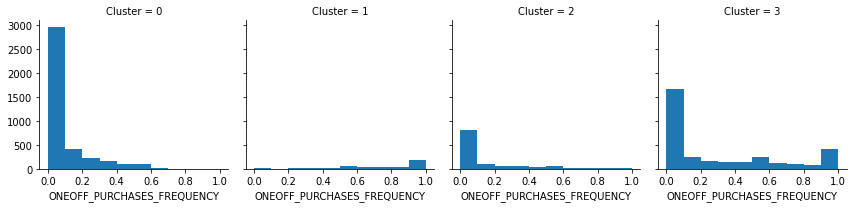

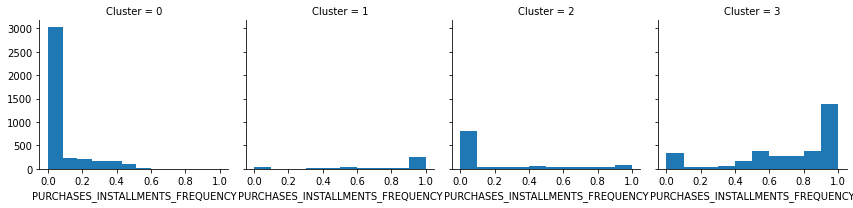

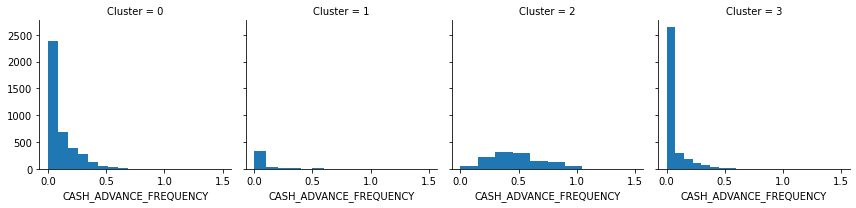

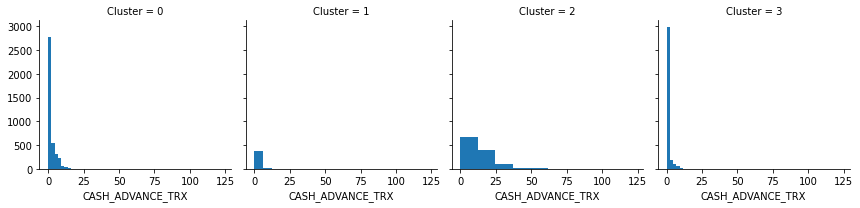

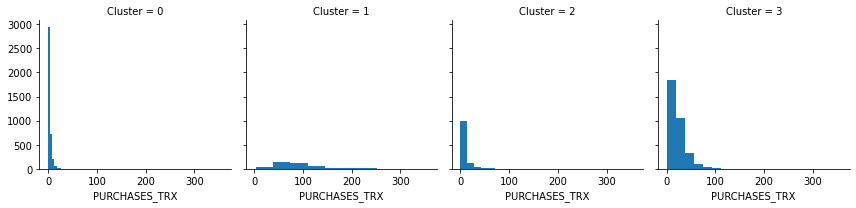

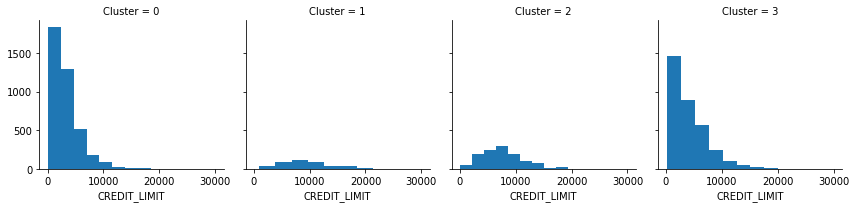

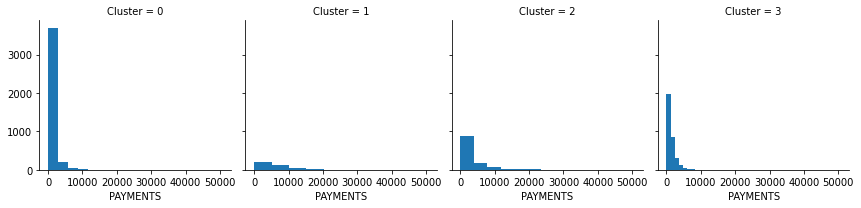

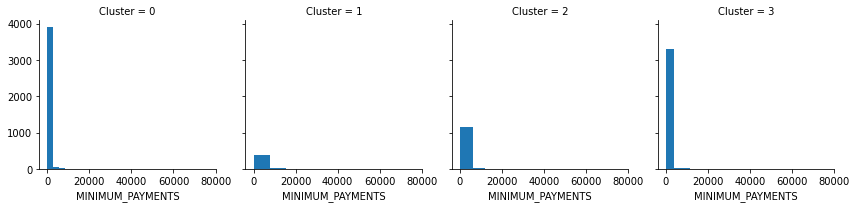

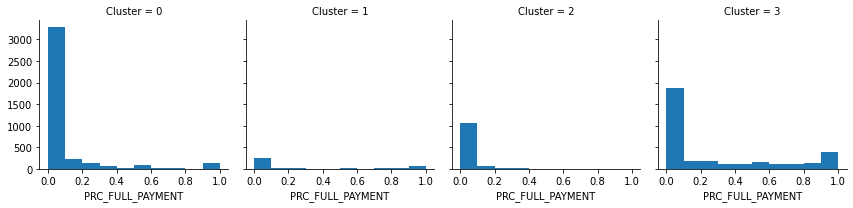

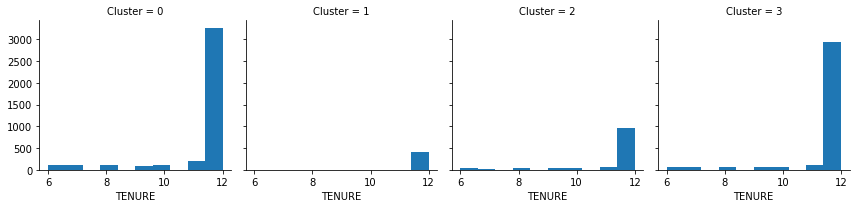

In [70]:
for i in cluster_df.drop(['Cluster'], axis = 1):
  grid = sns.FacetGrid(cluster_df, col = 'Cluster')
  grid = grid.map(plt.hist, i)
plt.show()  

# **Saving KMeans Clustering Model**

**Saving Sci-Kit Learn Model**

In [71]:
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [72]:
cluster_df.to_csv("Clustered_Customer_Dataset.csv")

# **Training and Testing Model Accuracy using Decision Tree**

**Split Dataset**

In [73]:
X = cluster_df.drop(['Cluster'], axis = 1)
Y = X = cluster_df[['Cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

In [74]:
X_train

,Cluster
5541,0
424,2
2460,0
1794,0
3400,2
...,...
3593,2
5997,3
173,0
3327,3


In [75]:
X_test

,Cluster
4415,3
326,1
6199,3
1518,2
3546,0
...,...
3517,0
5785,0
8683,0
8589,3


**Decision Tree**

In [76]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

**Confusion Matrix**

In [77]:
print(metrics.confusion_matrix(Y_test, Y_pred))

[[1584    0    0    0]
 [   0  147    0    0]
 [   0    0  487    0]
 [   0    0    0 1362]]


In [78]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1584
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       487
           3       1.00      1.00      1.00      1362

    accuracy                           1.00      3580
   macro avg       1.00      1.00      1.00      3580
weighted avg       1.00      1.00      1.00      3580



# **Saving Decision Tree model for Future Prediction**

In [79]:
import pickle
filename = 'terminal_model.sav'
pickle.dump(model, open(filename, 'wb'))

**Loading Model from Disk**

In [80]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result, '% Accuracy')

1.0 % Accuracy
